In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
# layers: backend, artist, scripting 
import matplotlib.pyplot as plt
plt.plot?

In [4]:
 plt.plot(3, 2)

<IPython.core.display.Javascript object>

In [5]:
plt.plot(3, 2, '.')

In [6]:
# interacting with the artist layer directly instead
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3, 2, '.')
canvas.print_png('test.png')

In [7]:
%%html
<img src='test.png' .>

In [8]:
# create new figure in pyplot and set new limits
plt.figure()
plt.plot(3, 2, 'o')
ax = plt.gca()
ax.axis([0, 6, 0, 10]) # [min_x, max_x, min_y, max_y]

<IPython.core.display.Javascript object>

[0, 6, 0, 10]

In [9]:
plt.figure()
plt.plot(1.5, 1.5, 'o')
plt.plot(2, 2, 'o')
plt.plot(2.5, 2.5, 'o')

<IPython.core.display.Javascript object>

In [10]:
ax = plt.gca() # get axes from plot
ax.get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

## Scatterplots

In [11]:
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

plt.figure()
plt.scatter(x, y)

<IPython.core.display.Javascript object>

In [12]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()
plt.scatter(x, y, s=100, c=colors)

<IPython.core.display.Javascript object>

In [13]:
plt.scatter?

In [14]:
# zip function as generator and list to display tuples built by zip
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
list(zip_generator)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [15]:
zip_generator = zip([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
x, y = zip(*zip_generator)
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


In [16]:
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

<IPython.core.display.Javascript object>

In [17]:
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')

Text(0.5,1,'Relationship between ball kicking and grades')

In [18]:
plt.legend()

In [19]:
plt.legend(loc=4, frameon=False, title='Legend')

In [20]:
plt.gca().get_children()

 Text(0.5,1,'Relationship between ball kicking and grades'),
 Text(0,1,''),
 Text(1,1,''),

In [21]:
legend = plt.gca().get_children()[-2]

In [22]:
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [23]:
# print all children of legend artist
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        print(" " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
rec_gc(legend)

Legend
      Text(0,0,'Legend')
            Text(0,0,'Tall students')
            Text(0,0,'Short students')
  FancyBboxPatch(0,0;1x1)


## Line Plots

In [24]:
import numpy as np

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')

<IPython.core.display.Javascript object>

In [25]:
plt.plot([22, 44, 55], '--r')

In [26]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us']) 
# since our data is not labeled, we must pass a list when calling legend

In [27]:
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, quadratic_data,
                      facecolor='blue',
                      alpha=0.25)

In [28]:
# datetime example
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

<IPython.core.display.Javascript object>

In [29]:
# datetime example with dates fixed
import pandas as pd

plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates)

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

<IPython.core.display.Javascript object>

RuntimeError: matplotlib does not support generators as input

In [ ]:
# datetime example with dates fixed
import pandas as pd

plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))

plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

In [ ]:
# rotate x axis tick labels

x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

In [ ]:
plt.subplots_adjust(bottom=0.25)

In [ ]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic vs. Linear performance')

In [ ]:
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$) performance')
# enclose latex statement between dollar ($) signs

<IPython.core.display.Javascript object>


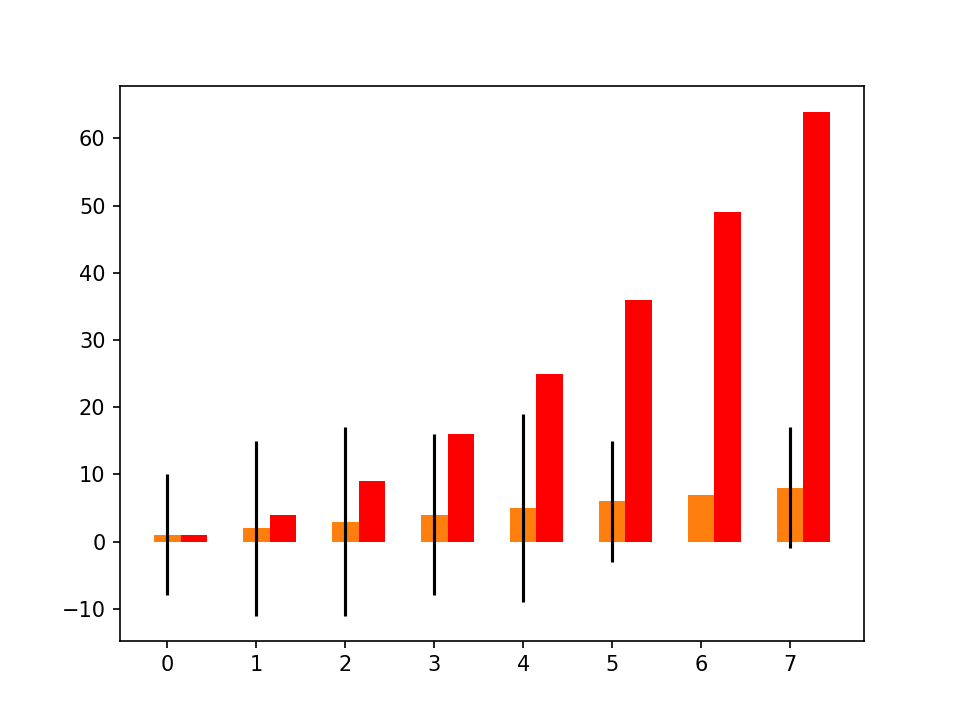

<Container object of 8 artists>

In [31]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [32]:
new_xvals = []
for item in xvals:
    new_xvals.append(item + 0.3)
    
plt.bar(new_xvals, quadratic_data, width = 0.3, color = 'red')

<Container object of 8 artists>

In [33]:
# example with hypothetical error bars
from random import randint
linear_err = [randint(0, 15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width=0.3, yerr=linear_err)

<Container object of 8 artists>

<IPython.core.display.Javascript object>


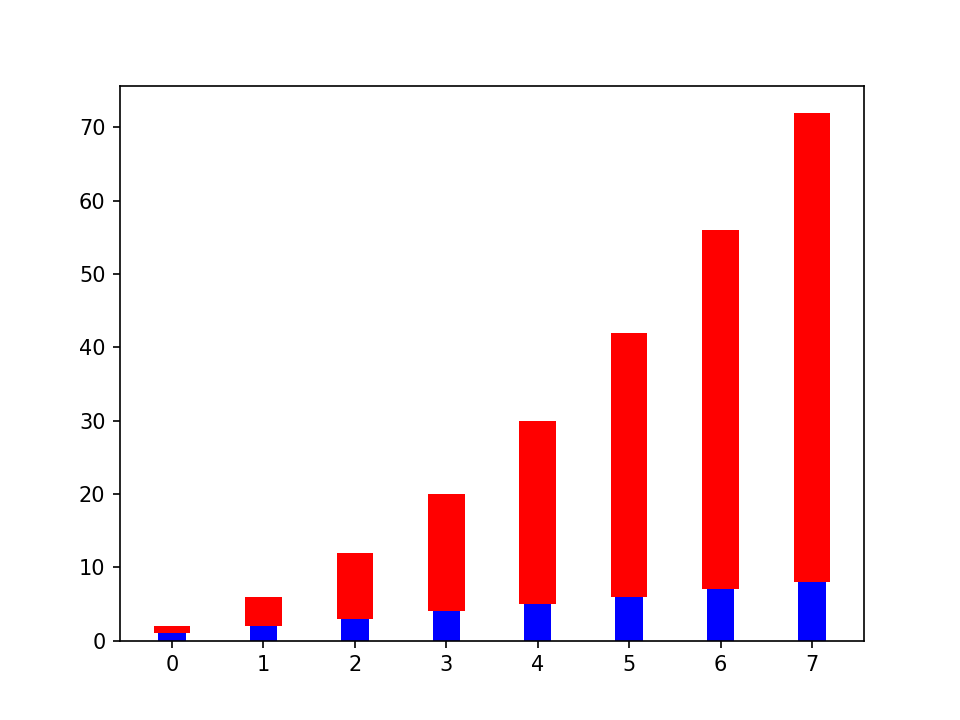

<Container object of 8 artists>

In [35]:
# stacked bars
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3, color='b')
plt.bar(xvals, quadratic_data, width=0.4, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


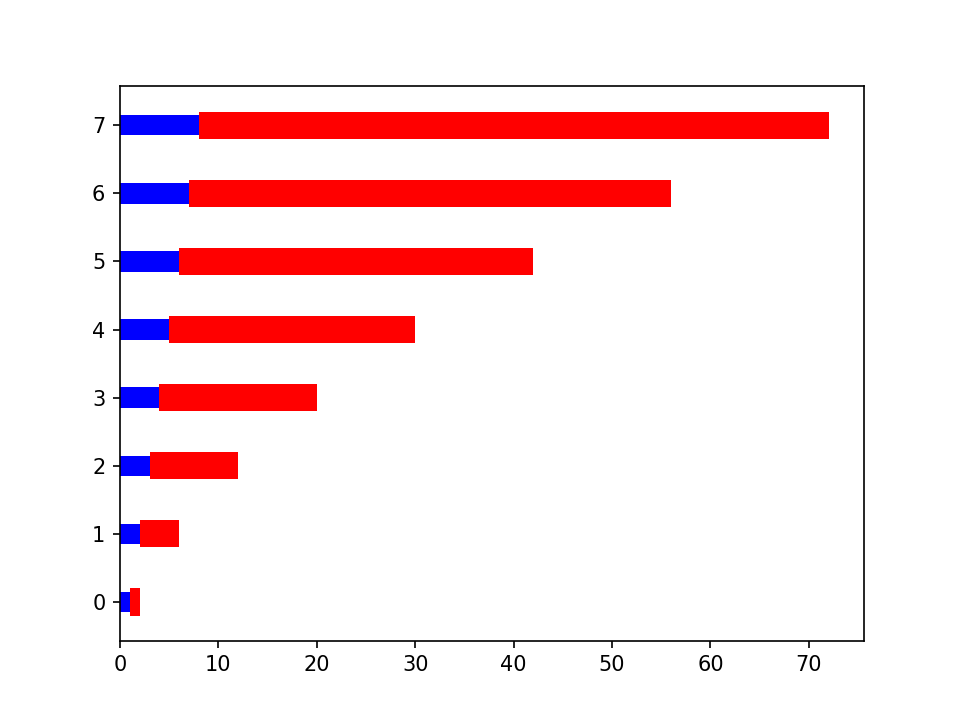

<Container object of 8 artists>

In [36]:
# horizontal bars. note the change from plt.bar to plt.barh, from width
# parameter to height, and from bottom parameter to left
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height=0.3, color='b')
plt.barh(xvals, quadratic_data, height=0.4, left=linear_data, color='r')

## Dejunkifying a Plot

In [37]:
popularity = {'Python': 56,
             'SQL': 39,
             'Java': 34,
             'C++': 34,
             'JavaScript': 29}

<IPython.core.display.Javascript object>


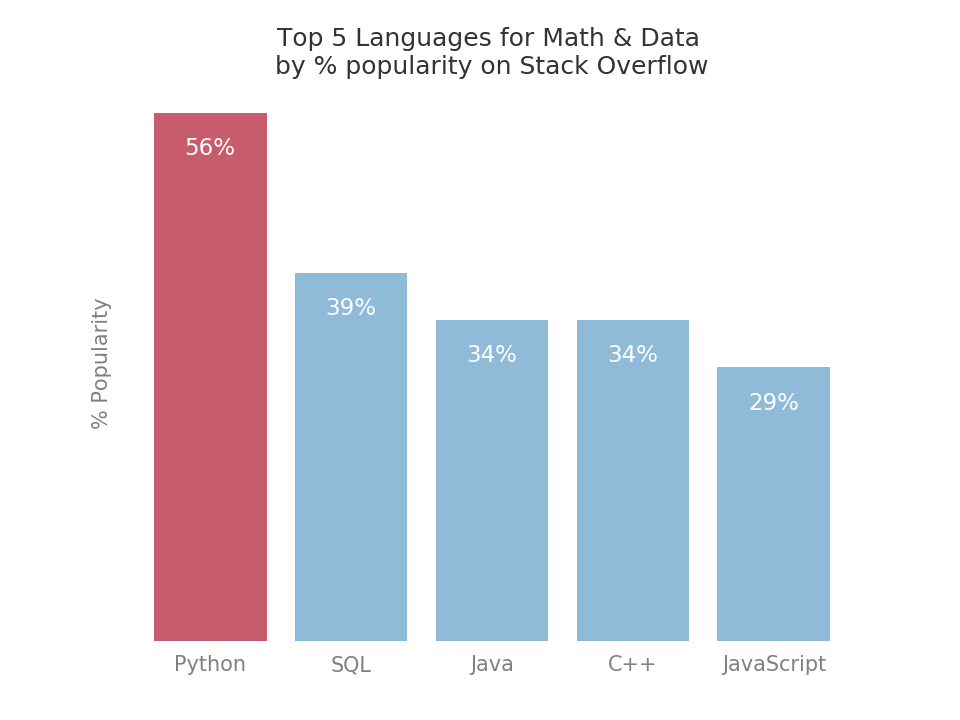

In [80]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

ax = plt.bar(pos, popularity, align='center', alpha=0.5)
plt.bar(pos[0], popularity[0], align='center', color= 'r', alpha=0.5)
plt.xticks(pos, languages)
plt.ylabel('% Popularity').set_color('gray')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

rects = ax.patches

#TODO: remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off',
               labelleft='off', colors='gray')

for rect, label in zip(rects, popularity):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height - 5, str(label) + '%',
            ha='center', va='bottom', color = 'w', fontsize=11)

plt.box(on=None)

plt.show()